In [47]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

model_init_year = 2016

t = np.array(range(model_init_year,2101))

converstionfactor = 1   # just as a place holder


def rhs(y, t, CO2emission_baseline,kappa_l,Do,gamma_l,gamma_o,c_amp,rho_a,beta_l,beta_o,lamb,rho_o,rho_od,beta_od,kappa_o): 
    T_a,C_a,C_o,C_od,T_o, E21 = y

    # convert CO2 emission to energy

    

    
    eq1 = 1/kappa_l*(CO2eff*np.log(C_a/cina)-lamb*T_a-Do*(T_a-T_o))
    
    eq2 = (CO2emission_baseline[int(t)-model_init_year]-(gamma_l+gamma_o)*eq1*(1+T_a*c_amp))/(1+rho_a*(beta_l))-beta_o*(rho_a*C_a-rho_o*C_o)

    # coupled eq2 = (CO2emission_actual[int(t)-model_init_year]-(gamma_l+gamma_o)*eq1*(1+T_a*c_amp))/(1+rho_a*(beta_l))-beta_o*(rho_a*C_a-rho_o*C_o)

    diffusion_to_ocean = (rho_a*C_a - rho_o*C_o)
    diffusion_to_deepocean = (rho_o*C_o - rho_od*C_od)

    eq3 = beta_o * diffusion_to_ocean + gamma_o*(1+T_a*c_amp)*eq1 - beta_od*diffusion_to_deepocean
    eq4 = beta_od * diffusion_to_deepocean
    eq5 = 1/kappa_o*Do*(T_a - T_o)


    # this is added on July 10 to include societal feedback.

    taoR21=100*np.exp(-1*T_a)
    taoP21=taoR21/2
    taoDV21=0
    taoDf21=25/(1+0.5*(T_a**2))
    k21=20*5  # trying to set it to E21 at year 2020 - am I doing it right?
    
    dE21_dt = (1-E21/k21)*(E21/(taoR21+taoP21+taoDV21+taoDf21))



    #    alternative case in which tao is the max of the 4 time constant
    #    dE21_dt = (1-E21/k21)*(E21/(max(taoR21+taoP21+taoDV21+taoDf21)))


    return np.array([eq1,eq2,eq3,eq4,eq5,dE21_dt])







In [48]:
# In[2]:


CO2eff=5.35 #6.3

mat=1.8e20 #moles in atm
rho_a=1e6/mat/12*1e15 #conversion factor from Pg to ppm

lamb=  1/ 0.8 # 3.8/4   # 1/0.8  #Climate feedback parameters(Wm-2K-1)


deltaT = 1  * 3.156* (1e7)  # seconds in a year
H = 997 * 4187 * 300  # heat capacity of global ocean

# note that #H/deltaT-kappa_l = ~40
kappa_l=30  # Land surface heat capacity (Wm-2)/(K/yr), note that the unit is convert to yr, not sec
kappa_o= 30 #H/deltaT-kappa_l # Ocean surface heat capacity 

Do=0.4 # heat diffusion coefficient from atm to ocean
# I change this from kdeep to Do, the table is wrong



c_amp=1.1 #carbon feedback amplification factor

beta_l=0.25 #Biosphere carbon fertilization parameter (Pgppm-1)
beta_o=0.1 #Ocean carbon diffusion parameter(Pgppm-1)
beta_od=0.25 #Deep shallow ocean carbon diffusion coefficient(Pgppm-1)


gamma_l=-0.13 #Biosphere temperature response(PgK-1)
gamma_o=-0.2 #Ocean carbon solubility response(PgK-1)



aco2c = 400  # atmospheric co2 concentration in ppm
cina = aco2c/rho_a  # carbon in atm ; ppm -> Pg

oco2c = aco2c  # the ocean is in balance with atm
cino = 100
rho_o=oco2c/cino  #  rho is to convert Pg to ppm

odco2c = aco2c # the deep ocean is in balance with atm 
cinod = 1e3
rho_od= odco2c/cinod

In [58]:
# In[3]:


y0 = [1,cina,cino,cinod,0.5, 5 ]# the initial values of T_a, C_a, C_o, C_od, T_o, E21 at year 2016
 # I am setting E21 at 5 GtCO2, a small fraction of the total.


# In[4]:


import scipy.io
mat = scipy.io.loadmat('CO2emissionRCPBAU85_SLR2012_Paris2015.mat')
CO2emission_baseline= mat['ECO2new'][0]   
# This is the baseline CO2 emission from RCP, in which little renewable is used.








In [59]:
y = odeint(rhs,y0,t,args = (CO2emission_baseline,kappa_l,Do,gamma_l,gamma_o,c_amp,rho_a,beta_l,beta_o,lamb,rho_o,rho_od,beta_od,kappa_o))



In [60]:
Totalenergy = CO2emission_baseline[2016-1850:] * converstionfactor

FFenergy = Totalenergy - y[:, 5]

    # convert energy into CO2 emission

CO2emission_actual = FFenergy / converstionfactor

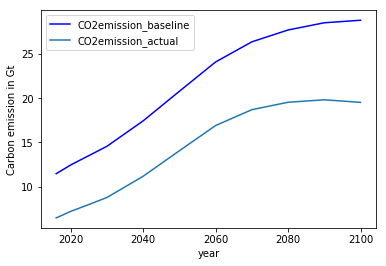

In [61]:
plt.plot(t, CO2emission_baseline[2016-1850:], 'b', label='CO2emission_baseline')
plt.plot(t,CO2emission_actual,label = 'CO2emission_actual')
plt.xlabel('year')
plt.ylabel('Carbon emission in Gt')
plt.legend()

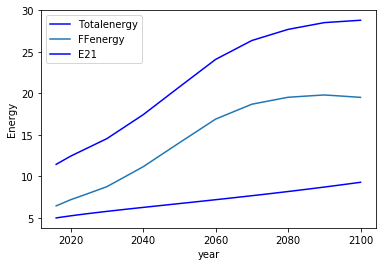

In [64]:
plt.plot(t, Totalenergy, 'b', label='Totalenergy')
plt.plot(t,FFenergy,label = 'FFenergy')
plt.plot(t, y[:,5], 'b', label='E21')
plt.xlabel('year')
plt.ylabel('Energy')
plt.legend()

In [ ]:
# Annie, can you plot the following time series (2016-2100), maybe in two plots (one for CO2, one for energy)

CO2emission_baseline

CO2emission_actual

Totalenergy

E21

FFenergy




# In[5]:


y = odeint(rhs,y0,t,args = (emis_t,kappa_l,Do,gamma_l,gamma_o,c_amp,rho_a,beta_l,beta_o,lamb,rho_o,rho_od,beta_od,kappa_o))


# In[6]:


# plt.plot(t, y[:, 0], 'b', label='theta(t)')
# plt.xlabel('time')
# plt.ylabel('Temperature of atmosphere')


# In[7]:


#plt.plot(t, y[:, 1]*rho_a, 'b', label='theta(t)')
#plt.xlabel('time')
#plt.ylabel('Carbon of atmosphere in ppm')


# In[8]:


#plt.plot(t, y[:, 2], 'b', label='theta(t)')
#plt.xlabel('time')
#plt.ylabel('Carbon of ocean in Gt')


# In[9]:


#plt.plot(t, y[:, 3], 'b', label='theta(t)')
#plt.xlabel('time')
#plt.ylabel('Carbon of deep ocean in Gt')


# In[10]:


plt.plot(t, y[:, 4], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Temperature of ocean')


# In[11]:


#Plot previously simulated CO2 concentration
mat = scipy.io.loadmat('CO2simulationRCPBAU85_SLR2012_Paris2015.mat')
pco2a = mat['pco2a_vec_mit']
t1 = np.array(range(1850,2100))
plt.plot(t1,pco2a[0],label='previously in PNAS2017')
plt.xlabel('year',fontsize=16, fontweight='bold')
plt.ylabel('CO2 concentration (ppm)',fontsize=16, fontweight='bold')
plt.plot(t, y[:, 1]*rho_a, 'b', label='new')
plt.legend()


# In[12]:


#plot of previously simulated temperature
# This is the simple formulation as in PNAS2017

f = lambda x: CO2eff*(np.log(pco2a[0][x]/aco2c))
T = [0]

for i in range(250):  
    Result = T[i] + (deltaT / H)*(f(i) - lamb*T[i])
    T.append(Result)
    
plt.plot(range(1850,2101),T,label = 'previously in PNAS2017')
plt.xlabel('years',fontsize=16, fontweight='bold')
plt.ylabel('Temperature(ºC)',fontsize=16, fontweight='bold')
plt.plot(t, y[:, 0], 'b', label='new')
plt.legend()

